In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

### Loading CSV Files from Results folder

In [2]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), '..', '..', 'Results','MPEC'))
print("\t",files_path)
files_name = 'Model_data_DA_'

ncda = 9

data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+'.csv')
    print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC
Reading file 1 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_1.csv
Reading file 2 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_2.csv
Reading file 3 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_3.csv
Reading file 4 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_4.csv
Reading file 5 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_5.csv
Reading file 6 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_6.csv
Reading file 7 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_7.csv
Reading file 8 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_8.csv
Reading file 9 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Result

In [27]:
data[0].head()

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,Bus3_price,Bus4_price,Bus5_price,Bus6_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Theta_bus_4,Theta_bus_5,Theta_bus_6
24,1,0.363861,0.00000,0.363861,0.00000,0.156681,0.000000,0.019659,0.011050,0.035159,...,15.00000,15.0,15.000000,15.000000,0.0,-0.153567,-0.180605,-0.187566,-0.202804,-0.193759
25,1,1.175346,0.00000,1.175346,0.00000,0.422979,0.000000,0.012406,0.051629,0.061350,...,38.77159,85.0,76.228410,43.038842,0.0,-0.255513,-0.340914,-0.472215,-0.509957,-0.382460
26,1,1.561521,0.00000,1.561521,0.00000,0.436000,0.000000,0.000000,0.037382,0.078352,...,60.00000,92.0,85.928174,62.953856,0.0,-0.255513,-0.362925,-0.472215,-0.511773,-0.443013
27,1,0.000000,0.03456,0.000000,0.03456,0.000000,0.115653,0.000000,0.000000,0.081093,...,60.00000,110.0,100.512771,64.615400,0.0,-0.255513,-0.362925,-0.472215,-0.543787,-0.427413
28,1,0.314334,0.00000,0.314334,0.00000,0.110001,0.000000,0.000000,0.010484,0.080402,...,60.00000,105.0,96.461494,64.153860,0.0,-0.255513,-0.362925,-0.472215,-0.520214,-0.433492


### Dropping iteration zero [0] 
The first iteration is only for warmup as DAs prediction/forecast for rivals

In [4]:
for df in data:
    df.drop(df[df.Iteration==0].index, inplace=True)
    #df.reset_index(level='index' , inplace=True)

In [5]:
# Dictionary for DAs categories
categories = dict()
for i in range(1,ncda+1):
    if i%2==0:
        categories['DA'+str(i)] = "CAT_01"
    elif i%3==0:
        categories['DA'+str(i)] = "CAT_02"
    else:
        categories['DA'+str(i)] = "CAT_03"

In [6]:
EVs_charge=[]
EVs_discharge=[]
load =[]
generation =[]
bus_price = []
time = [x for x in range(16,40)]
iter_time =[]
cat = []
DA  = []

In [7]:
for i in range(ncda):
    df=data[i]
    EVs_charge.extend(df['EVs_Charge'])
    EVs_discharge.extend(df['EVs_Discharge'])
    load.extend(df['DAs_load\nE_DAs_L'])
    generation.extend(df['DAs_generation\nE_DAs_G'])
    for b in range(1,7):
        if len(bus_price)==6:
            temp = bus_price[b-1]
            temp.extend(df['Bus'+str(b)+'_price'])
            bus_price[b-1] = temp
        else:
            temp =  df['Bus'+str(b)+'_price'].tolist()
            bus_price.append(temp)
    cat.extend([categories['DA'+str(i+1)]]*24)
    DA.extend(["DA"+str(i+1)]*24)
    if i > 0:
        time.extend([x for x in range(16,40)])
    else:
        time = [x for x in range(16,40)]

In [8]:
temp = {'EVs_charge':EVs_charge,
                  'EVs_discharge':EVs_discharge,
                  'load':load,
                  'generation':generation,
                  'time':time,
       'category':cat,
       'DA':DA}
for b in range(1,7):
    temp['Bus'+str(b)+'_price'] = bus_price[b-1]

df = pd.DataFrame(temp)

In [9]:
for x in range(16,40):
    if x >=24:
        index = df[df['time'] == x].index
        df.loc[index,'time'] = df.time[index]%24
        #print(df.time[index]%24)

In [10]:
# Selected and categorized data
#df.time[[0,1,5]]%10
#df['time']

### Average EVS Charge/Discharge for each category
- Cat_01: 75% evs participatoin, 50% PVs penetration
- Cat_02: 50% evs participatoin, 30% PVs penetration
- Cat_02: 35% evs participatoin, 20% PVs penetration

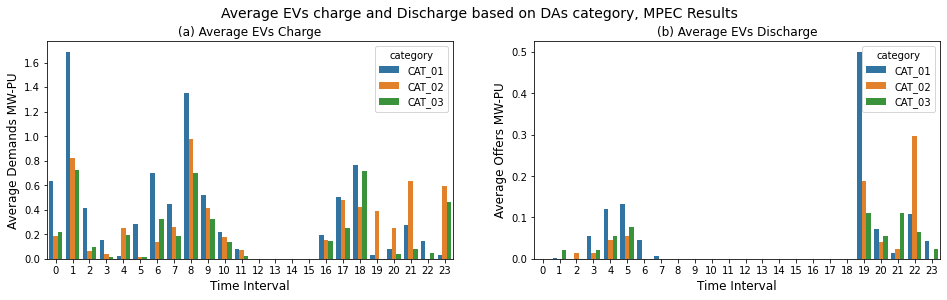

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

#order = ['Mixed', 'Fixed_EVs', 'Fixed_PVs']

sns.barplot(data= df.groupby(['time', 'category']).mean().reset_index(),
            x='time', y='EVs_charge', hue='category', ax=axes[0])

axes[0].set_title("(a) Average EVs Charge", fontsize=12)
axes[0].set_xlabel('Time Interval',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);


sns.barplot(data= df.groupby(['time', 'category']).mean().reset_index(),
            x='time', y='EVs_discharge', hue='category', ax=axes[1])

axes[1].set_title("(b) Average EVs Discharge", fontsize=12)
axes[1].set_xlabel('Time Interval',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);


fig.suptitle('Average EVs charge and Discharge based on DAs category, MPEC Results', fontsize=14, y=1.);

### Average Bus Price based on categories

In [12]:
def drop_non_selection(dataframe, selection):
    temp = df.groupby(['time', 'category']).mean().reset_index()
    drop_list=[]
    for col in temp.columns:
        if col not in selection:
            drop_list.append(col)

    temp.drop(columns= drop_list, inplace=True )
    return temp

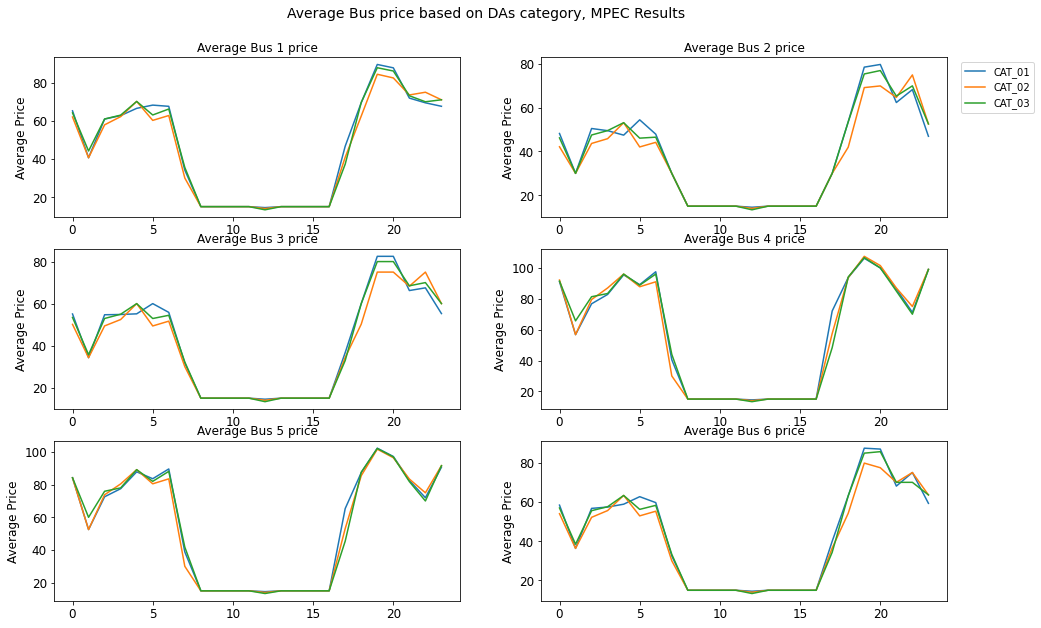

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

#order = ['Mixed', 'Fixed_EVs', 'Fixed_PVs']
bus_names = ['Bus'+str(i)+'_price' for i in range(1,7)]

row=0
col=0

for i in range(1,7):
    temp = df.groupby(['time', 'category']).mean().reset_index()
    selection = ['time', 'category', bus_names[i-1]]
    temp = drop_non_selection(temp, selection)
    
    col = (i-1)%2
    if i>1 and col==0:
        row=row+1
    
    sns.lineplot(data= df.groupby(['time', 'category']).mean().reset_index(),
            x='time', y=bus_names[i-1], hue='category', ax=axes[row,col])
    axes[row,col].set_title("Average Bus {} price".format(i), fontsize=12)
    axes[row,col].set_xlabel("")
    axes[row,col].set_ylabel("Average Price")

fig.suptitle('Average Bus price based on DAs category, MPEC Results', fontsize=14, y=0.95);

#handles, labels = axes.flatten()[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.88))

for ax in axes.flatten():
    ax.get_legend().remove()
    #ax.set_rasterized(True)
    for item in ([ ax.xaxis.label, ax.yaxis.label] +ax.get_xticklabels() + ax.get_yticklabels()): # [ ax.yaxis.label] + 
        item.set_fontsize(12)

0 0
0 1
0 2
1 0
1 1
1 2
